## Yelp Review Classification

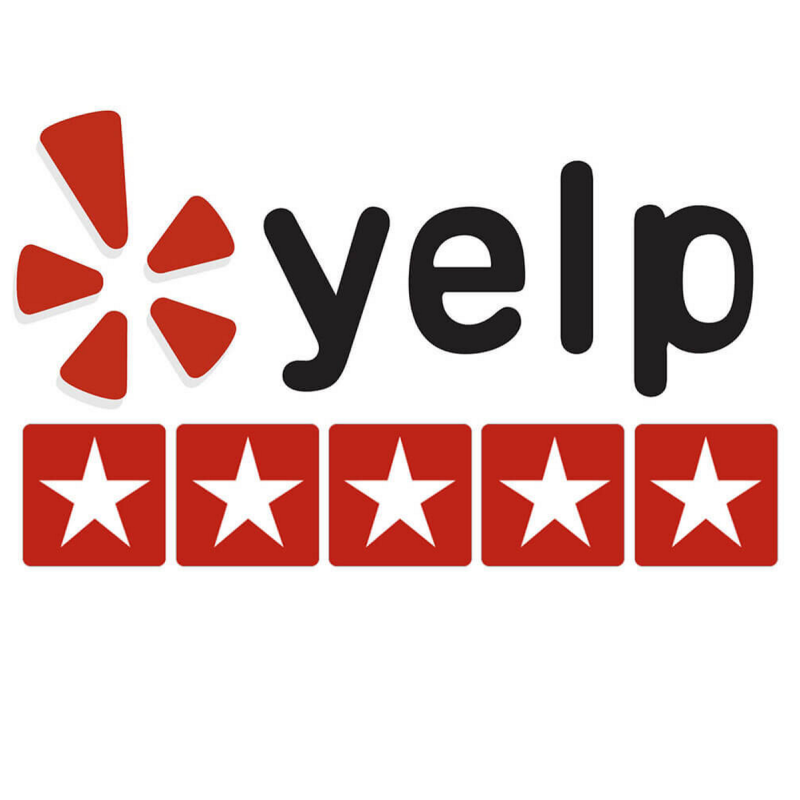

### Brief description
* In this project Natural Language Processing(NLP) strategies will be used to analyze Yelp reviews data.
* Yelp is an app that provide a crowd-sourced review forum to business and services. The app is used publish crowd-sourced reviews about businesses.
* Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5. 
* 'Cool', 'Useful', 'Funny' indicate the number of cool votes given by other Yelp Users.

### Objective of project
* Discover insights into consumer reviews and perform sentiment analysis on the data and wrangling with unbalanced dataset

### My role
* Worked more that 20 hours a week as a data scientist within a team of 4 to produce visualizations of reviews using Matplotlib, Seaborn, Wordcloud and learned how to deal with unbalanced dataset.

### Data
1. Yelp review dataset is also very unbalanced (3337 positives review vs 749 negative reviews or 81.7% vs 18.3%).
2. The review length is also different for both positive and negative reviews.

### Models and Tools Used
1. Penalizing with parameter class_weight = 'balanced'
2. Balancing the class before classification from sklearn.imblearn: SMOTE, NearMiss
3. Using of specific balanced algorithms from imbalanced-learn:
        BalancedRandomForestClassifier
        EasyEnsembleClassifier,
        RUSBoostClassifier
        BalancedBaggingClassifier

## Step #0: Libraries import

In [1]:
#For loading dataset & for linear algebra
import pandas as pd
import numpy as np

#Visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#For Natural Language Processing
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#Model training preparation
from sklearn.model_selection import (train_test_split, 
                                     RepeatedStratifiedKFold, 
                                     GridSearchCV)

#Models: Classification
from sklearn.ensemble import (RandomForestClassifier,
                             BaggingClassifier,
                             AdaBoostClassifier, 
                             VotingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import LinearSVC, SVC

#Metrics
from sklearn.metrics import (roc_auc_score, 
                            confusion_matrix,
                            balanced_accuracy_score, 
                            classification_report, 
                            plot_confusion_matrix)

#Scikit-learn: imbalanced
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import (BalancedBaggingClassifier, 
                              EasyEnsembleClassifier, 
                              RUSBoostClassifier, 
                              BalancedRandomForestClassifier)

from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

from sklearn import set_config
set_config(display="text")

In [2]:
#Some functions

# Removing punctuation and stopwords
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_cleaned = [word for word in test_punc_removed_join.split() 
                                      if word.lower() not in stopwords.words('english')]
    
    return test_punc_removed_join_cleaned

# Define GridSearch CV
def grid_search_model(model, param_grid, cv):
    grid_search = GridSearchCV(model, param_grid, cv = cv, n_jobs = -1, scoring = 'roc_auc')
    return grid_search

## Step #1: Import dataset

In [3]:
# Load dataset
yelp_df = pd.read_csv('../yelp.csv')

In [4]:
# Show first five records
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
# Show last five records
yelp_df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [6]:
# See statistics
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
# See information about dataset
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


## Step #2: Visualize dataset

In [679]:
# Using ProfileReport

profile = ProfileReport (yelp_df, title = 'Yelp_review', explorative = True, 
                         plot = {'correlation': {'annot': True}}, 
                         html = {'style': {'full_width': True }}) 

profile.to_file("yelp_review_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Create new feature 'length' of review
yelp_df['length'] = yelp_df['text'].apply(len)
yelp_df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,274
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186


<AxesSubplot:ylabel='Frequency'>

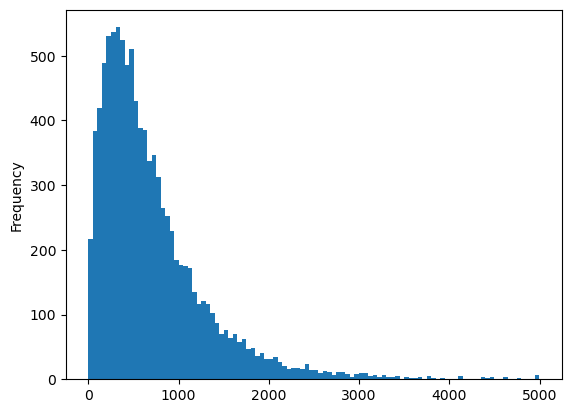

In [9]:
# See distribution
yelp_df['length'].plot(bins = 100, kind = 'hist')

We can see a skewed distribution of 'length'. Visitors generally left up to 500 characters in reviews.

In [10]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [11]:
# Let's take a look at the longest review
yelp_df[yelp_df['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

It is a positive review

In [12]:
# Let's take a look at the shortest review
yelp_df[yelp_df['length'] == 1]['text'].iloc[0]

'X'

It seems to be a negative review

In [13]:
# Let's look at a review with an average character count
yelp_df[yelp_df['length'] == 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

It is a positive review

In [14]:
# Analysis of dates
# Let's see if there is a relationship between the time and date of leaving a review
# We need to create new features from 'date'

yelp_df['month'] = pd.DatetimeIndex(yelp_df['date']).month
yelp_df['weekday'] = pd.DatetimeIndex(yelp_df['date']).weekday
yelp_df['year'] = pd.DatetimeIndex(yelp_df['date']).year

yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,month,weekday,year
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,1,2,2011
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,7,2,2011
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,6,3,2012
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,5,3,2010
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,1,3,2012


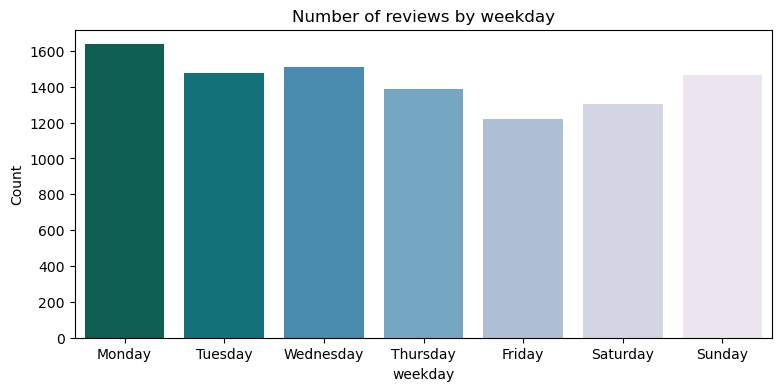

In [15]:
plt.figure(figsize = (9, 4))
sns.countplot(x = yelp_df['weekday'], data = yelp_df, palette = 'PuBuGn_r')
plt.xticks(range(7), 'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split())
plt.ylabel('Count')
plt.title('Number of reviews by weekday')
plt.show()

The most frequently registered reviews were those left on Monday, followed by Wednesday and Sunday. It is possible that people most often went to restaurants with their family on weekends and left reviews after visiting

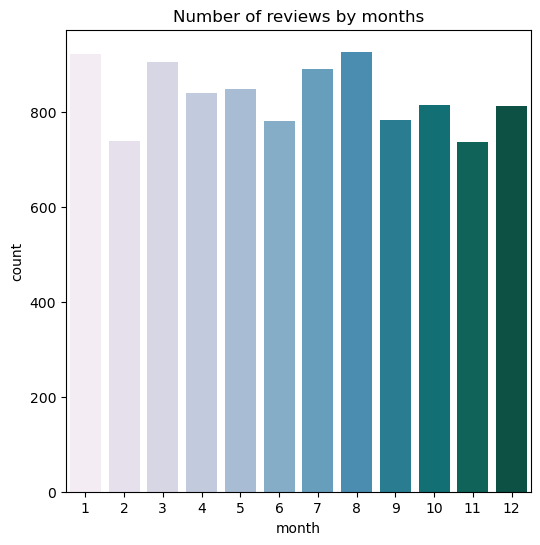

In [16]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'month', data = yelp_df, palette = 'PuBuGn')
plt.title('Number of reviews by months')
plt.show()

We see that in the summer most of the reviews were recorded, perhaps this is due to the holidays, when people are more inclined to meet and spend time at a joint lunch or dinner. It is possible that there were many weekends or holidays in January and March, in connection with which we also see more reviews than in other months

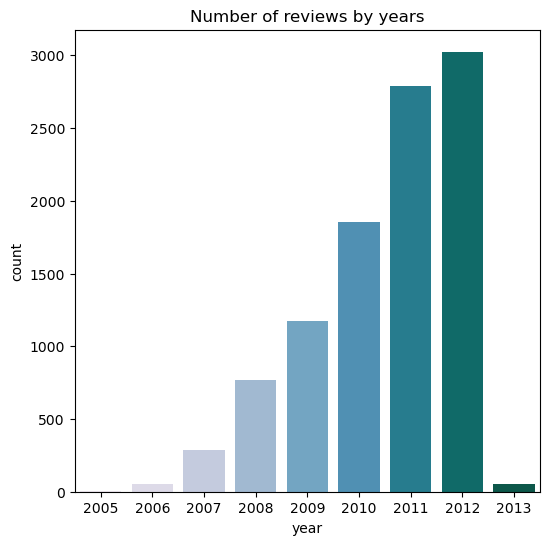

In [17]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'year', data = yelp_df, palette = 'PuBuGn')
plt.title('Number of reviews by years')
plt.show()

Yelp was founded in 2004, since then we can see increase tend of popularity till 2012. In the dataset, data for 2013 is only for the first week of January

In [18]:
yelp_df[yelp_df['year'] == 2013]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,month,weekday,year
26,qjmCVYkwP-HDa35jwYucbQ,2013-01-03,kZ4TzrVX6qeF0OvrVTGVEw,5,I love love LOVE this place. My boss (who is i...,review,fpItLlgimq0nRltWOkuJJw,0,0,0,921,1,3,2013
254,MuIXnv7Oq7X3-4aEsp9dDA,2013-01-02,CD3QORZYdE0UKBrdyylYsQ,5,Our server Gary was awesome. Food was amazing....,review,qK_o6Chm8VakPzeMCurtWA,0,0,0,62,1,2,2013
267,eM0BAZ57RDHdhvXc72O8Pg,2013-01-04,sM0CDlYCfv7Q7K1z2kEN-g,3,We have been to this location to buy gear prio...,review,z5QQGDqErjMKD8XtM00s7g,0,0,0,422,1,4,2013
438,B6sT5YGBYB9KfhkiZtzQ4A,2013-01-02,IdFTGG7jVjN-NAJc09hKYg,4,We have tried every Chinese delivery in Chande...,review,GveOUdXagY6tuZttk2SUew,0,0,0,364,1,2,2013
601,VDzgxHjMJj-1nMfJMtcSPQ,2013-01-01,YlAdlU2f1Fumt7U6OGUs0A,2,Tried this for the first time today. While my...,review,uQcl8Usm1cK9bQYbpXYdiQ,0,2,0,549,1,1,2013
627,3Df6ICj0rHROVH4xUlb7Yw,2013-01-04,1lfLTA62ZTVTRoAeXC7EXA,4,We were staying at a local hotel and used onli...,review,z5QQGDqErjMKD8XtM00s7g,0,0,0,450,1,4,2013
633,29hR24tcAM3JZaXfA5xCxQ,2013-01-05,lI8Bo4AMQT7C-zNLgvRasw,4,My husband surprised me with a stay-cation at ...,review,PWtlBs3PCH1l0DdypgEszw,0,1,0,1483,1,5,2013
720,j5HLcBru7FEirYJPbKFVWA,2013-01-02,UYn6Kod4ZluHcuMZRG55jA,4,Nice place surrounded by many fast food places...,review,M-d7R2GVDqUi8iBaLyXcwg,0,0,0,229,1,2,2013
1073,1oFvqm7eSpJbVpxpPxueaA,2013-01-03,xUz7NWXlO6jXnZ7oaP7RtA,2,I've been to multiple Buca di Beppo locations ...,review,z5QQGDqErjMKD8XtM00s7g,0,0,0,1048,1,3,2013
1575,5jazn-RZP2R6ZkCIPZsf0w,2013-01-03,lr7ue4c2BjJIi3yXdAZTKA,5,Wow this place is fabulous. Everything is so ...,review,19z2sZCwjNveJf6koqlplQ,0,0,0,729,1,3,2013


We can check that we have reviews dated on 2013 only for first four days of January.

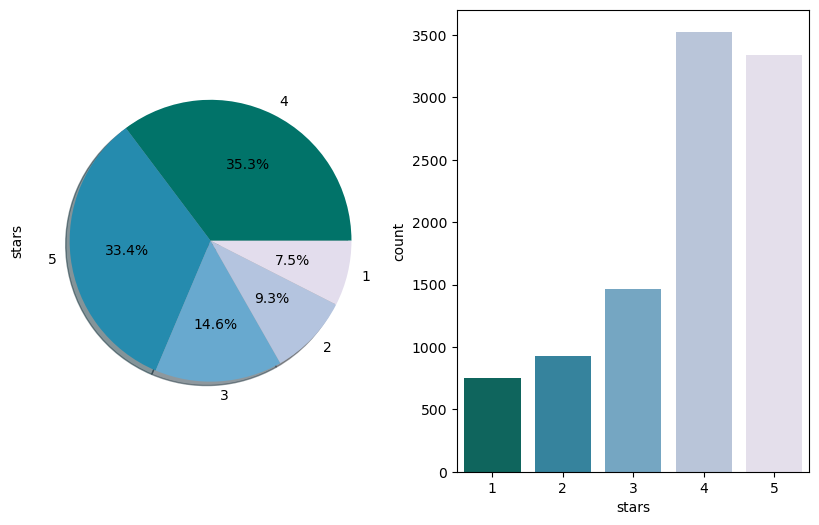

In [31]:
# Explore 'stars'
plt.figure(figsize = (10, 6))

plt.subplot(1, 2, 1)
colors = sns.color_palette('PuBuGn_r', len(yelp_df['stars'].unique()))
yelp_df['stars'].value_counts().plot.pie(shadow = True, autopct = '%1.1f%%', colors = colors)

plt.subplot(1, 2, 2)
sns.countplot(x = 'stars', data = yelp_df, palette = 'PuBuGn_r')
    
plt.show()

We can see that only 7.5% of reviews were with 1-star, 9.3% of reviews were with 2-star, then 14.6% of reviews were with 3-star and most of the reviews were with 4 and 5 stars.

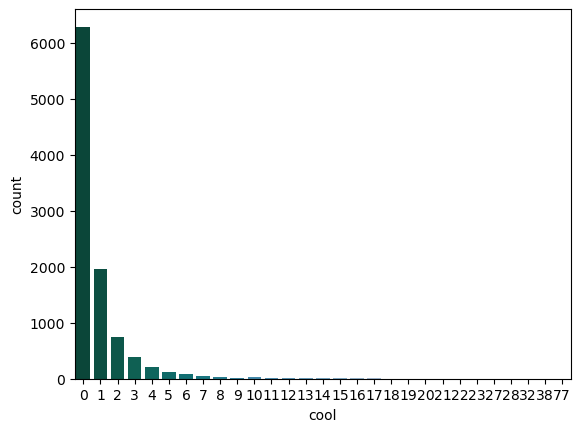

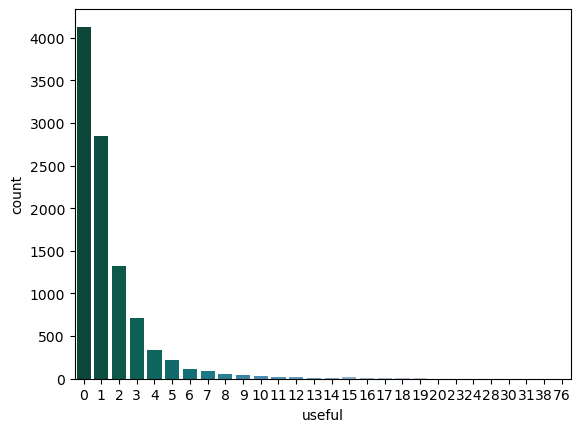

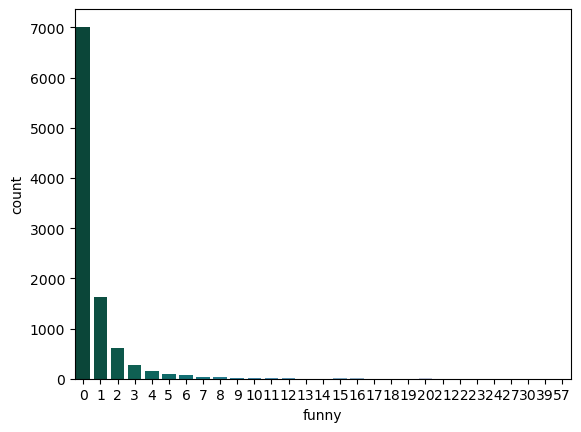

In [22]:
# Explore 'cool', 'useful', 'funny'

for col in ['cool', 'useful', 'funny']:
    fig = sns.countplot(x = col, data = yelp_df, palette = 'PuBuGn_r')
    plt.show()

It seems that labels 'cool', 'useful', 'funny' don't have additive information, let's check correlation between variables.

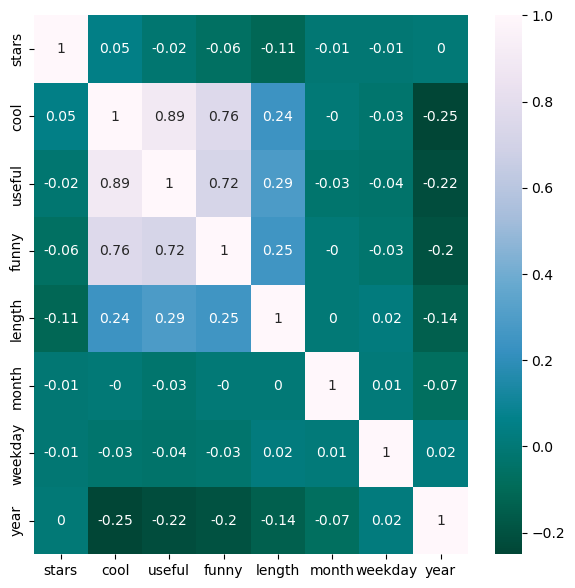

In [23]:
# Chec correltion between features

corr = yelp_df.corr().round(2)
fig = plt.figure(figsize = (7, 7))
sns.heatmap(corr, annot = True, cmap = 'PuBuGn_r')
plt.show()

'cool', 'funny', 'useful' are correlated with each other and correspondingly the 'length' of text is also the correlation index of text length is also almost the same for them. We need to define target variable, so we will not use 'cool', 'funny', 'useful' in our analysis.

In [24]:
#Create new df with 1-star and 5-star reviews

yelp_df_1 = yelp_df[yelp_df['stars'] == 1]
yelp_df_5 = yelp_df[yelp_df['stars'] == 5]

In [25]:
# See first rows of 1-star review df
yelp_df_1.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,month,weekday,year
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594,9,6,2010
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361,5,4,2012
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198,11,2,2011
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569,11,1,2011
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498,5,5,2012


In [26]:
# See first rows of 5-star review df
yelp_df_5.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,month,weekday,year
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,1,2,2011
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,7,2,2011
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,5,3,2010
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,1,3,2012
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565,2,4,2010


In [27]:
# Concat two datasets
yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5])

In [28]:
# See first rows of new dataset
yelp_df_1_5.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,month,weekday,year
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594,9,6,2010
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361,5,4,2012
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198,11,2,2011
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569,11,1,2011
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498,5,5,2012


In [29]:
# See information about new created dataset
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
 11  month        4086 non-null   int64 
 12  weekday      4086 non-null   int64 
 13  year         4086 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 478.8+ KB


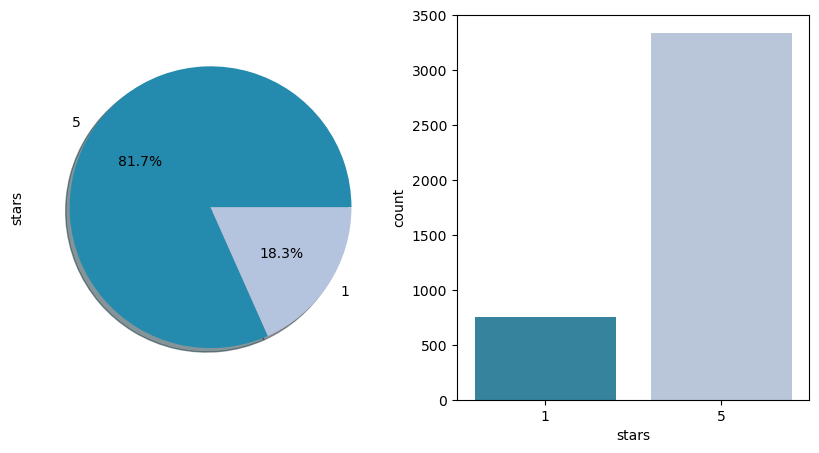

In [30]:
# Explore 'stars' in new df

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
colors = sns.color_palette('PuBuGn_r', len(yelp_df_1_5['stars'].unique()))
yelp_df_1_5['stars'].value_counts().plot.pie(shadow = True, autopct = '%1.1f%%', colors = colors)

plt.subplot(1, 2, 2)
sns.countplot(x = 'stars', data = yelp_df_1_5, palette = 'PuBuGn_r')
    
plt.show()

After creating new dataset with 1 and 5 stars in reviews we received unbalanced dataset with 18.3% of negative reviews and 81.7% of positive reviews. 

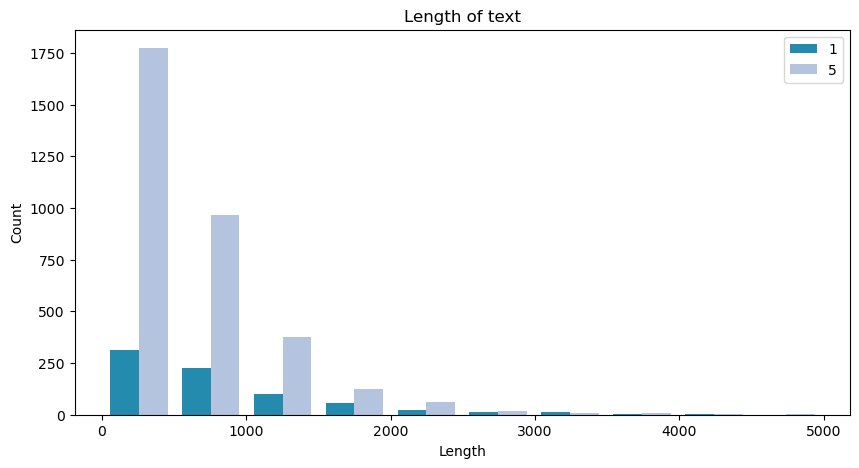

In [32]:
# Length of text

one_star = yelp_df_1_5[yelp_df_1_5['stars'] == 1]
five_stars = yelp_df_1_5[yelp_df_1_5['stars'] == 5]

one_star_lengths = one_star['text'].str.len()
five_stars_lenghts = five_stars['text'].str.len()

plt.figure(figsize = (10, 5))
colors = sns.color_palette('PuBuGn_r', 2) 
plt.hist([one_star_lengths, five_stars_lenghts], label = ['1', '5'], color = colors)
plt.title('Length of text')
plt.ylabel('Count')
plt.xlabel('Length')
plt.legend(loc = 'best')
plt.show()

We see that if users left a negative review, then it was no more than 1000 characters.

### Word cloud feedback

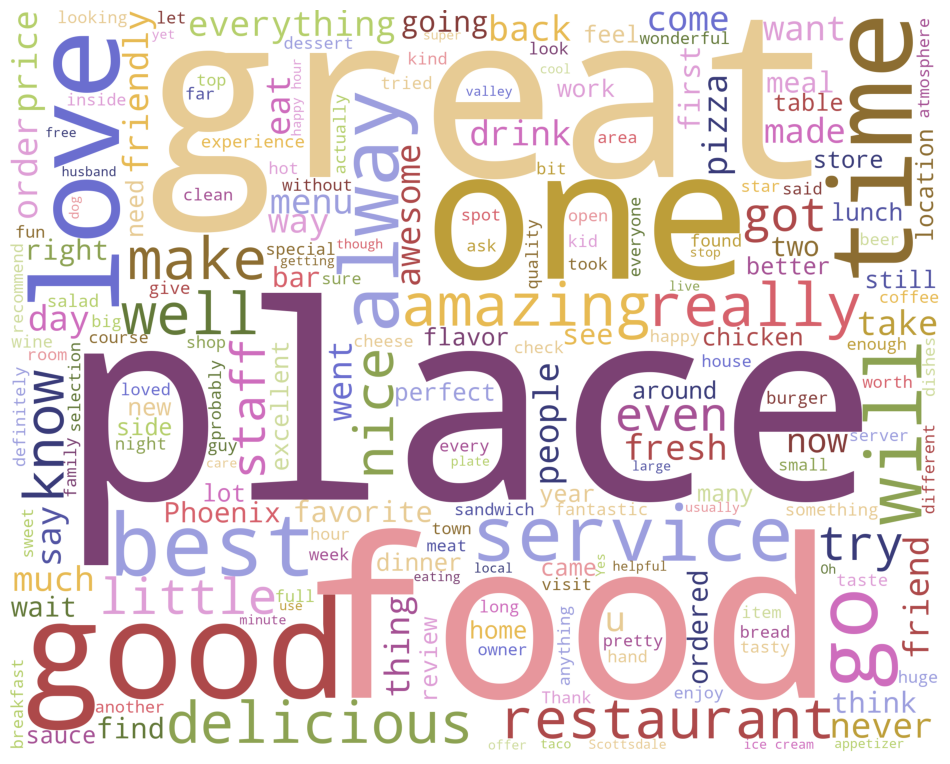

In [677]:
# Check what words are most often found in positive reviews
df_pos = yelp_df_1_5[yelp_df_1_5['stars'] == 5]['text']
wordcloud_pos = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 2500,
                      height = 2000, colormap = 'tab20b_r').generate(" ".join(df_pos))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

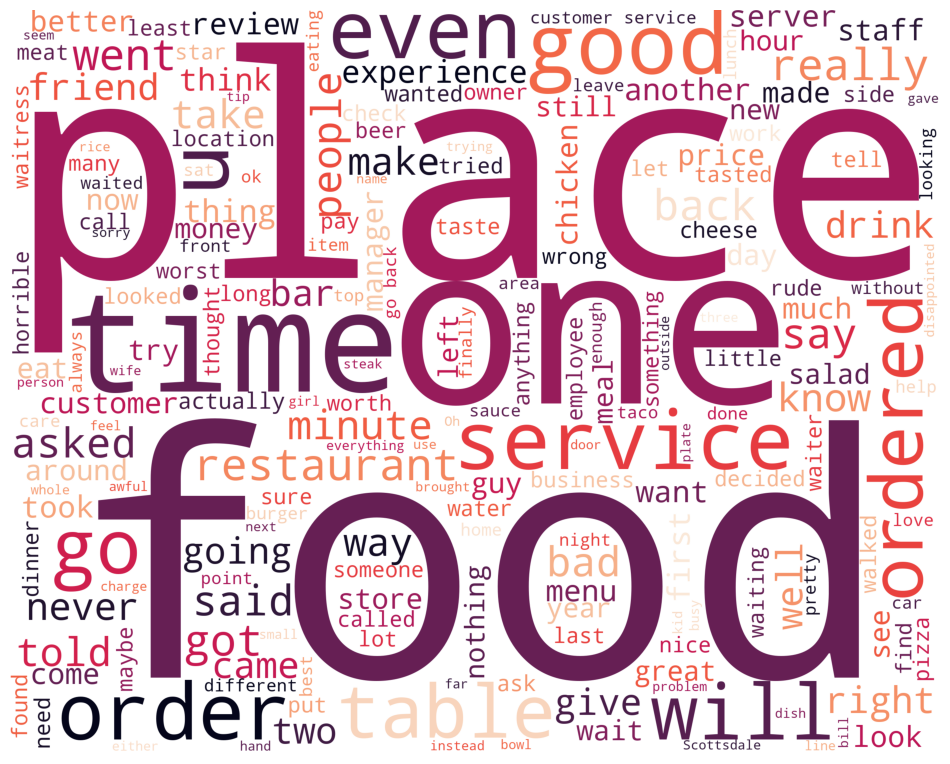

In [676]:
# Check what words are most often found in negative reviews
df_neg = yelp_df_1_5[yelp_df_1_5['stars'] == 1]['text']
wordcloud_neg = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 2500,
                      height = 2000, colormap = 'rocket_r').generate(" ".join(df_neg))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

## Step #3: Prepare the data for training / data cleaning

## Text preprocessing

In [33]:
# We will use TfidfVectorizer to prepare text before training
vectorizer = TfidfVectorizer(analyzer = message_cleaning)
yelp_tfidvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [34]:
print(vectorizer.get_feature_names_out())

['0' '00s' '01042012' ... 'École' 'éclairs' 'ém']


In [35]:
yelp_tfidvectorizer.shape

(4086, 26435)

After preprocessing we received 26435 columns!

## Step #4: Divide the data into training and testing prior to training

In [36]:
label = yelp_df_1_5['stars'].values

In [37]:
# Define independent and target variables
X = yelp_tfidvectorizer
y = label

In [38]:
X.shape

(4086, 26435)

In [39]:
y.shape

(4086,)

In [40]:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
X_train.shape, X_test.shape

((3268, 26435), (818, 26435))

In [42]:
# RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 10, random_state = 1)

In [43]:
# To save the model results into lists

model_list = []
roc_auc_score_list = []
balanced_accuracy_list = []
geometric_mean_list = []

### Prepare dataset: undersampling & oversampling data

As we have unbalanced dataset, we'll try to generate new data or reduce some data from imbalanced-learn library

In [44]:
# Oversampling dataset
smote_os = SMOTE(random_state = 10)
X_train_os, y_train_os = smote_os.fit_resample(X_train, y_train)

In [45]:
#Before under- and over- sampling
print(Counter(y_train))

Counter({5: 2684, 1: 584})


In [46]:
#After oversampling
print(Counter(y_train_os))

Counter({5: 2684, 1: 2684})


In [47]:
#Undesampling dataset
near_us = NearMiss(version = 1)
X_train_us, y_train_us = near_us.fit_resample(X_train, y_train)

In [48]:
#After undersampling
print(Counter(y_train_us))

Counter({1: 584, 5: 584})


## Step #5: Model training & Searching hyperparameters with Grid-Search CV

## ComplementNB

In [49]:
# Define model
NB_classifier = ComplementNB(alpha = 0.04)

In [50]:
# Define parameters for GridSearch CV
NB_param_grid = { 
    'alpha': [0.01, 0.02, 0.03, 0.04, 0.1]
}

In [51]:
# Define GridSearch CV
NB_grid_search = grid_search_model(NB_classifier, NB_param_grid, cv)

In [52]:
%%timeit -r 1 -n 1   # Calculate time needed for searching parameters and training

NB_grid_search.fit(X_train, y_train)

1.23 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [53]:
# The best parameters for this model
NB_grid_search.best_params_

{'alpha': 0.03}

In [54]:
# Predict results

y_train_pred_NB = NB_grid_search.predict(X_train)
y_test_pred_NB = NB_grid_search.predict(X_test)

print('Train set')
print('Complement Naive Bayes roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_NB)))

print('Test set')
print('Complement Naive Bayes roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_NB)))

Train set
Complement Naive Bayes roc-auc: 0.994
Test set
Complement Naive Bayes roc-auc: 0.884


In [55]:
# Check how many times our model was wrong in train set
cm_NB_train = confusion_matrix(y_train, y_train_pred_NB)
cm_NB_train

array([[ 580,    4],
       [  16, 2668]])

In [56]:
# Check how many times our model was wrong in test set
cm_NB_test = confusion_matrix(y_test, y_test_pred_NB)
cm_NB_test

array([[150,  15],
       [ 92, 561]])

In [57]:
print(classification_report_imbalanced(y_train, y_train_pred_NB))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.97      0.99      0.99      0.98      0.99      0.99       584
          5       1.00      0.99      0.99      1.00      0.99      0.99      2684

avg / total       0.99      0.99      0.99      0.99      0.99      0.99      3268



In [58]:
print(classification_report_imbalanced(y_test, y_test_pred_NB))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.62      0.91      0.86      0.74      0.88      0.78       165
          5       0.97      0.86      0.91      0.91      0.88      0.78       653

avg / total       0.90      0.87      0.90      0.88      0.88      0.78       818



In [59]:
# Save results in lists
model_list.append('Complement Naive Bayes')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_NB), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_NB), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_NB), 3))

## Complement Naive Bayes with oversampling

In [60]:
# Define model
NB_classifier_os = ComplementNB()

In [61]:
# Define GridSearch CV
NB_grid_search_os = grid_search_model(NB_classifier_os, NB_param_grid, cv)

In [62]:
%%timeit -r 1 -n 1    # Calculate time needed for searching parameters and training

NB_grid_search_os.fit(X_train_os, y_train_os)

395 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [63]:
# The best parameters for this model
NB_grid_search_os.best_params_

{'alpha': 0.01}

In [64]:
# Predict results
y_train_pred_NB_os = NB_grid_search_os.predict(X_train_os)
y_test_pred_NB_os = NB_grid_search_os.predict(X_test)

print('Train set')
print('Complement Naive Bayes with oversampling roc-auc: {:.3f}'. format(roc_auc_score(y_train_os, y_train_pred_NB_os)))

print('Test set')
print('Complement Naive Bayes with oversampling roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_NB_os)))

Train set
Complement Naive Bayes with oversampling roc-auc: 0.996
Test set
Complement Naive Bayes with oversampling roc-auc: 0.755


In [65]:
print(classification_report_imbalanced(y_train_os, y_train_pred_NB_os))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.99      1.00      0.99      1.00      1.00      0.99      2684
          5       1.00      0.99      1.00      1.00      1.00      0.99      2684

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      5368



In [66]:
print(classification_report_imbalanced(y_test, y_test_pred_NB_os))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.77      0.55      0.96      0.64      0.73      0.51       165
          5       0.89      0.96      0.55      0.93      0.73      0.55       653

avg / total       0.87      0.88      0.63      0.87      0.73      0.54       818



In [67]:
# Save results in lists
model_list.append('Complement Naive Bayes (oversampling)')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_NB_os), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_NB_os), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_NB_os), 3))

## Complement Naive Bayes with undersampling

In [68]:
# Define model
NB_classifier_us = ComplementNB()

In [69]:
# Define GridSearch CV
NB_grid_search_us = grid_search_model(NB_classifier_us, NB_param_grid, cv)

In [70]:
%%timeit -r 1 -n 1    # Calculate time needed for searching parameters and training
NB_grid_search_us.fit(X_train_us, y_train_us)

177 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [71]:
# The best parameters for this model
NB_grid_search_us.best_params_

{'alpha': 0.1}

In [72]:
# Predict results
y_train_pred_NB_us = NB_grid_search_us.predict(X_train_us)
y_test_pred_NB_us = NB_grid_search_us.predict(X_test)

print('Train set')
print('Complement Naive Bayes with undersampling roc-auc: {:.3f}'. format(roc_auc_score(y_train_us, y_train_pred_NB_us)))

print('Test set')
print('Complement Naive Bayes with undersampling roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_NB_us)))

Train set
Complement Naive Bayes with undersampling roc-auc: 0.991
Test set
Complement Naive Bayes with undersampling roc-auc: 0.868


In [73]:
print(classification_report_imbalanced(y_train_us, y_train_pred_NB_us))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.99      0.99      0.99      0.99      0.99      0.98       584
          5       0.99      0.99      0.99      0.99      0.99      0.98       584

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      1168



In [74]:
print(classification_report_imbalanced(y_test, y_test_pred_NB_us))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.66      0.85      0.89      0.74      0.87      0.75       165
          5       0.96      0.89      0.85      0.92      0.87      0.76       653

avg / total       0.90      0.88      0.86      0.89      0.87      0.76       818



In [75]:
# Save results in lists
model_list.append('Complement Naive Bayes (undersampling)')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_NB_us), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_NB_us), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_NB_us), 3))

## Confusion matrix: Complement Naive Bayes

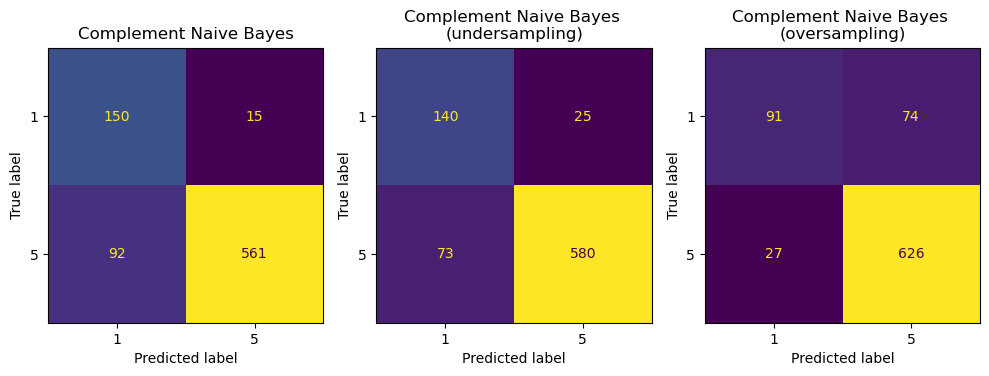

In [76]:
fig, axs = plt.subplots(ncols = 3, figsize = (10, 5))
plot_confusion_matrix(NB_grid_search, X_test, y_test, ax = axs[0], colorbar = False)
axs[0].set_title("Complement Naive Bayes")

plot_confusion_matrix(NB_grid_search_us, X_test, y_test, ax = axs[1], colorbar = False)
axs[1].set_title("Complement Naive Bayes \n(undersampling)")

plot_confusion_matrix(NB_grid_search_os, X_test, y_test, ax = axs[2], colorbar = False)
axs[2].set_title("Complement Naive Bayes \n(oversampling)")

fig.tight_layout()

Original Complement Naive Bayes model has the lowest rate of Type I error, but the greatest rate of Type II error. Complement Naive Bayes with oversampling has less count of Type II error (27 times) but the biggest count of Type I error.

## Logistic Regression

In [77]:
# Define model
LR = LogisticRegression(random_state = 0, 
                        class_weight = 'balanced', 
                        C = 0.05, 
                        max_iter = 200, 
                        multi_class = 'multinomial'
                       )

In [78]:
# Define parameters for GridSearch CV
LR_param_grid = { 
    'max_iter': [200, 300, 400],
    'penalty': ['l1', 'l2'], 
    'solver': ['lbfgs', 'liblinear'], 
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'dual': [True, False]
}

In [79]:
# Define GridSearch CV
LR_grid_search = grid_search_model(LR, LR_param_grid, cv)

In [80]:
%%timeit -r 1 -n 1     # Calculate time needed for searching parameters and training
LR_grid_search.fit(X_train, y_train)

5.47 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [59]:
# The best parameters for this model
LR_grid_search.best_params_

{'dual': False,
 'max_iter': 200,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [81]:
# Predict results
y_train_pred_LR = LR_grid_search.predict(X_train)
y_test_pred_LR = LR_grid_search.predict(X_test)

print('Train set')
print('Logistic Regression roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_LR)))

print('Test set')
print('Logistic Regression roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_LR)))

Train set
Logistic Regression roc-auc: 0.952
Test set
Logistic Regression roc-auc: 0.873


In [82]:
print(classification_report_imbalanced(y_train, y_train_pred_LR))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.80      0.96      0.95      0.87      0.95      0.91       584
          5       0.99      0.95      0.96      0.97      0.95      0.91      2684

avg / total       0.96      0.95      0.96      0.95      0.95      0.91      3268



In [83]:
print(classification_report_imbalanced(y_test, y_test_pred_LR))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.81      0.79      0.95      0.80      0.87      0.74       165
          5       0.95      0.95      0.79      0.95      0.87      0.77       653

avg / total       0.92      0.92      0.83      0.92      0.87      0.76       818



In [84]:
# Save results in lists
model_list.append('Logistic Regression')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_LR), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_LR), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_LR), 3))

## Logistic Regression with oversampling

In [85]:
# Define model
LR_os = LogisticRegression(random_state = 0, 
                           max_iter = 200, 
                           penalty = 'l2', 
                           solver = 'liblinear', 
                           C = 0.01, 
                           multi_class = 'multinomial'
                          )

In [86]:
# Define GridSearch CV
LR_os_grid_search = grid_search_model(LR_os, LR_param_grid, cv)

In [87]:
%%timeit -r 1 -n 1     # Calculate time needed for searching parameters and training

LR_os_grid_search.fit(X_train_os, y_train_os)

7.59 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [88]:
# The best parameters for this model
LR_os_grid_search.best_params_

{'dual': False,
 'max_iter': 200,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [89]:
# Predict results
y_train_pred_LR_os = LR_os_grid_search.predict(X_train_os)
y_test_pred_LR_os = LR_os_grid_search.predict(X_test)

print('Train set')
print('Logistic Regression with oversampling roc-auc: {:.3f}'. format(roc_auc_score(y_train_os, y_train_pred_LR_os)))

print('Test set')
print('Logistic Regression with oversampling roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_LR_os)))

Train set
Logistic Regression with oversampling roc-auc: 0.930
Test set
Logistic Regression with oversampling roc-auc: 0.805


In [90]:
print(classification_report_imbalanced(y_train_os, y_train_pred_LR_os))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.95      0.90      0.96      0.93      0.93      0.86      2684
          5       0.91      0.96      0.90      0.93      0.93      0.87      2684

avg / total       0.93      0.93      0.93      0.93      0.93      0.86      5368



In [91]:
print(classification_report_imbalanced(y_test, y_test_pred_LR_os))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.81      0.65      0.96      0.72      0.79      0.60       165
          5       0.92      0.96      0.65      0.94      0.79      0.64       653

avg / total       0.89      0.90      0.71      0.89      0.79      0.64       818



In [92]:
# Save the model results into lists
model_list.append('Logistic Regression (oversampling)')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_LR_os), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_LR_os), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_LR_os), 3))

## Logistic Regression with undersampling

In [93]:
# Define model
LR_us = LogisticRegression(random_state = 0, 
                           max_iter = 200, 
                           penalty = 'l2', 
                           solver = 'liblinear', 
                           C = 0.01, 
                           multi_class = 'multinomial'
                          )

In [94]:
# Define GridSearch CV
LR_us_grid_search = grid_search_model(LR_us, LR_param_grid, cv)

In [95]:
%%timeit -r 1 -n 1     # Calculate time needed for searching parameters and training
LR_us_grid_search.fit(X_train_us, y_train_us)

3.93 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [96]:
# The best parameters for this model
LR_us_grid_search.best_params_

{'dual': False,
 'max_iter': 200,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [97]:
# Predict results
y_train_pred_LR_us = LR_us_grid_search.predict(X_train_us)
y_test_pred_LR_us = LR_us_grid_search.predict(X_test)

print('Train set')
print('Logistic Regression with undersampling roc-auc: {:.3f}'. format(roc_auc_score(y_train_us, y_train_pred_LR_us)))

print('Test set')
print('Logistic Regression with undersampling roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_LR_us)))

Train set
Logistic Regression with undersampling roc-auc: 0.926
Test set
Logistic Regression with undersampling roc-auc: 0.817


In [98]:
print(classification_report_imbalanced(y_train_us, y_train_pred_LR_us))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.90      0.96      0.90      0.93      0.93      0.86       584
          5       0.95      0.90      0.96      0.92      0.93      0.85       584

avg / total       0.93      0.93      0.93      0.93      0.93      0.86      1168



In [99]:
print(classification_report_imbalanced(y_test, y_test_pred_LR_us))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.47      0.89      0.74      0.61      0.81      0.67       165
          5       0.96      0.74      0.89      0.84      0.81      0.65       653

avg / total       0.86      0.77      0.86      0.79      0.81      0.66       818



In [100]:
# Save the model results into lists
model_list.append('Logistic Regression (undersampling)')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_LR_us), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_LR_us), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_LR_us), 3))

## Confusion matrix: Logistic Regression

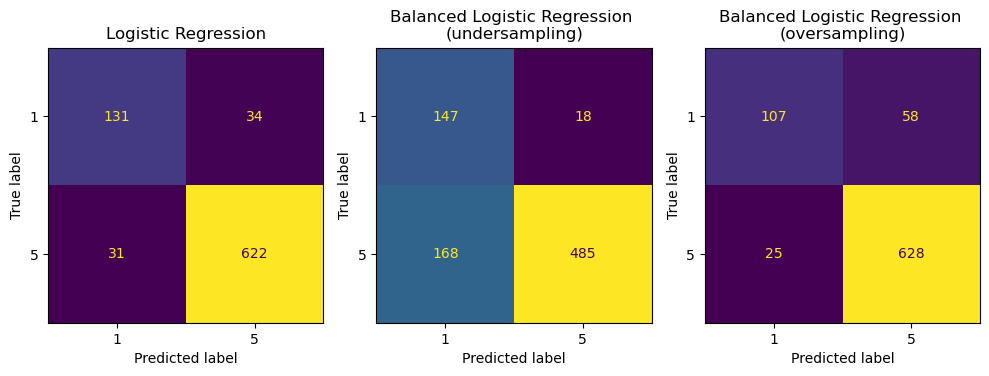

In [101]:
fig, axs = plt.subplots(ncols = 3, figsize = (10, 5))
plot_confusion_matrix(LR_grid_search, X_test, y_test, ax = axs[0], colorbar = False)
axs[0].set_title("Logistic Regression")

plot_confusion_matrix(LR_us_grid_search, X_test, y_test, ax = axs[1], colorbar = False)
axs[1].set_title("Balanced Logistic Regression \n(undersampling)")

plot_confusion_matrix(LR_os_grid_search, X_test, y_test, ax = axs[2], colorbar = False)
axs[2].set_title("Balanced Logistic Regression \n(oversampling)")

fig.tight_layout()

Original Logistic Regression made wrong predictions 65 times, whereas Balanced Logistic Regression with oversampling or undersampling were wrong 83 and 186 times. In this case is better using Logistic Regression with regularization. 

## BaggingClassifier

In [102]:
# Define model
bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(
                            max_depth = 4,
                            class_weight = 'balanced', 
                            random_state = 10, 
                            splitter = 'random', 
                            max_leaf_nodes = 1, 
                            max_features = 'log2'), 
                            n_estimators = 50, 
                            random_state = 10, 
                            verbose = 0
                           )

In [103]:
# Define parameters for GridSearch CV
bag_clf_param_grid = {
     'base_estimator__max_depth': [2, 3, 4], 
     'base_estimator__criterion': ["gini", "entropy", "log_loss"], 
     'base_estimator__max_leaf_nodes': [None, 1, 2, 3],
     'base_estimator__max_features': ["sqrt", "log2", None]
}

In [104]:
# Define GridSearch CV 
bag_clf_grid_search = grid_search_model(bag_clf, bag_clf_param_grid, cv)

In [105]:
%%timeit -r 1 -n 1   # Calculate time needed for searching parameters and training

bag_clf_grid_search.fit(X_train, y_train)

13min 8s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [106]:
# The best parameters for this model

bag_clf_grid_search.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 4,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None}

In [108]:
# Predict results
y_train_pred_bag = bag_clf_grid_search.predict(X_train)
y_test_pred_bag = bag_clf_grid_search.predict(X_test)

print('Train set')
print('Bagging Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_bag)))

print('Test set')
print('Bagging Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_bag)))

Train set
Bagging Classifier roc-auc: 0.812
Test set
Bagging Classifier roc-auc: 0.771


In [109]:
print(classification_report_imbalanced(y_train, y_train_pred_bag))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.40      0.93      0.69      0.56      0.80      0.66       584
          5       0.98      0.69      0.93      0.81      0.80      0.63      2684

avg / total       0.87      0.73      0.89      0.77      0.80      0.63      3268



In [110]:
print(classification_report_imbalanced(y_test, y_test_pred_bag))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.41      0.86      0.68      0.55      0.77      0.60       165
          5       0.95      0.68      0.86      0.79      0.77      0.58       653

avg / total       0.84      0.72      0.82      0.75      0.77      0.58       818



In [111]:
# Save results in lists
model_list.append('Bagging Classifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_bag), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_bag), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_bag), 3))

## BaggingClassifier with oversampling

In [112]:
# Define model
bag_os = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 4), n_estimators = 100)

In [113]:
# Define GridSearch CV
bag_os_grid_search = grid_search_model(bag_os, bag_clf_param_grid, cv)

In [114]:
%%timeit -r 1 -n 1    # Calculate time needed for searching parameters and training
bag_os_grid_search.fit(X_train_os, y_train_os)

40min 15s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [115]:
# The best parameters for this model
bag_os_grid_search.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 4,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__max_leaf_nodes': None}

In [116]:
# Predict results

y_train_pred_bag_os = bag_clf_grid_search.predict(X_train_os)
y_test_pred_bag_os = bag_clf_grid_search.predict(X_test)

print('Train set')
print('Bagging Classifier with oversampling roc-auc: {:.3f}'. format(roc_auc_score(y_train_os, y_train_pred_bag_os)))

print('Test set')
print('Bagging Classifier with oversampling roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_bag_os)))

Train set
Bagging Classifier with oversampling roc-auc: 0.818
Test set
Bagging Classifier with oversampling roc-auc: 0.771


In [117]:
print(classification_report_imbalanced(y_train_os, y_train_pred_bag_os))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.75      0.94      0.69      0.84      0.81      0.67      2684
          5       0.93      0.69      0.94      0.79      0.81      0.64      2684

avg / total       0.84      0.82      0.82      0.82      0.81      0.65      5368



In [118]:
print(classification_report_imbalanced(y_test, y_test_pred_bag_os))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.41      0.86      0.68      0.55      0.77      0.60       165
          5       0.95      0.68      0.86      0.79      0.77      0.58       653

avg / total       0.84      0.72      0.82      0.75      0.77      0.58       818



In [119]:
# Save results in lists
model_list.append('Bagging Classifier (oversampling)')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_bag_os), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_bag_os), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_bag_os), 3))

## BaggingClassifier with undersampling

In [120]:
# Define model
bag_us = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 4), n_estimators = 50)

In [121]:
# Define GridSearch CV
bag_us_grid_search = grid_search_model(bag_us, bag_clf_param_grid, cv)

In [122]:
%%timeit -r 1 -n 1   # Calculate time needed for searching parameters and training
bag_us_grid_search.fit(X_train_us, y_train_us)

4min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [123]:
# The best parameters for this model
bag_us_grid_search.best_params_

{'base_estimator__criterion': 'log_loss',
 'base_estimator__max_depth': 4,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__max_leaf_nodes': None}

In [124]:
# Predict results
y_train_pred_bag_us = bag_us_grid_search.predict(X_train_us)
y_test_pred_bag_us = bag_us_grid_search.predict(X_test)

print('Train set')
print('Bagging Classifier with undersampling roc-auc: {:.3f}'. format(roc_auc_score(y_train_us, y_train_pred_bag_us)))

print('Test set')
print('Bagging Classifier with undersampling roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_bag_us)))

Train set
Bagging Classifier with undersampling roc-auc: 0.864
Test set
Bagging Classifier with undersampling roc-auc: 0.745


In [125]:
print(classification_report_imbalanced(y_train_us, y_train_pred_bag_us))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.92      0.80      0.93      0.85      0.86      0.73       584
          5       0.82      0.93      0.80      0.87      0.86      0.75       584

avg / total       0.87      0.86      0.86      0.86      0.86      0.74      1168



In [126]:
print(classification_report_imbalanced(y_test, y_test_pred_bag_us))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.46      0.70      0.79      0.55      0.74      0.55       165
          5       0.91      0.79      0.70      0.85      0.74      0.56       653

avg / total       0.82      0.77      0.72      0.79      0.74      0.56       818



In [127]:
# Save the model results into lists
model_list.append('Bagging Classifier (undersampling)')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_bag_us), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_bag_us), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_bag_us), 3))

### Confusion matrix: Bagging Classifier

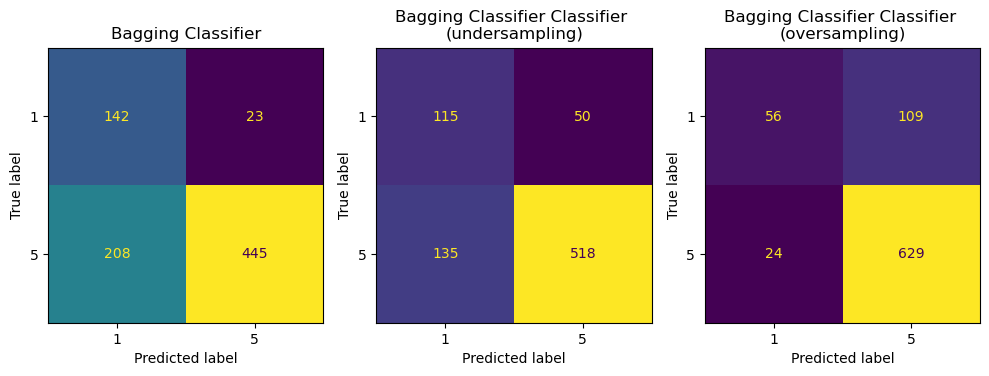

In [128]:
fig, axs = plt.subplots(ncols = 3, figsize = (10, 5))
plot_confusion_matrix(bag_clf_grid_search, X_test, y_test, ax = axs[0], colorbar = False)
axs[0].set_title("Bagging Classifier")

plot_confusion_matrix(bag_us_grid_search, X_test, y_test, ax = axs[1], colorbar = False)
axs[1].set_title("Bagging Classifier Classifier \n(undersampling)")

plot_confusion_matrix(bag_os_grid_search, X_test, y_test, ax = axs[2], colorbar = False)
axs[2].set_title("Bagging Classifier Classifier \n(oversampling)")

fig.tight_layout()

If we compare the results with previous models, then this Bagging Classifier is relatively weak, since it makes a lot of mistakes

## Random Forest Classifier

In [129]:
# Define model
rf = RandomForestClassifier(n_estimators = 400, 
                            max_depth = 3, 
                            class_weight = 'balanced'
                           )

In [130]:
# Define parameters for GridSearch CV
rf_param_grid = {
    'max_depth': [2, 3, 4],
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'min_samples_split': [2, 3, 4]
}

In [131]:
# Define GridSearch CV 
rf_grid_search = grid_search_model(rf, rf_param_grid, cv)

In [132]:
%%timeit -r 1 -n 1    # Calculate time needed for searching parameters and training
rf_grid_search.fit(X_train, y_train)

2min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [133]:
# The best parameters for this model
rf_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 4}

In [134]:
# Predict results
y_train_pred_rf = rf_grid_search.predict(X_train)
y_test_pred_rf = rf_grid_search.predict(X_test)

print('Train set')
print('Random Forest Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_rf)))

print('Test set')
print('Random Forest Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_rf)))

Train set
Random Forest Classifier roc-auc: 0.875
Test set
Random Forest Classifier roc-auc: 0.816


In [135]:
print(classification_report_imbalanced(y_train, y_train_pred_rf))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.83      0.79      0.96      0.81      0.87      0.74       584
          5       0.95      0.96      0.79      0.96      0.87      0.77      2684

avg / total       0.93      0.93      0.82      0.93      0.87      0.77      3268



In [136]:
print(classification_report_imbalanced(y_test, y_test_pred_rf))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.78      0.68      0.95      0.73      0.80      0.63       165
          5       0.92      0.95      0.68      0.94      0.80      0.66       653

avg / total       0.89      0.90      0.73      0.89      0.80      0.66       818



In [137]:
# Save the model results into lists
model_list.append('Random Forest Classifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_rf), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_rf), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_rf), 3))

## Random Forest Classifier with oversampling

In [138]:
# Define model
rf_os = RandomForestClassifier(n_estimators = 400, max_depth = 4)

In [139]:
# Define GridSearch CV
rf_os_grid_search = grid_search_model(rf_os, rf_param_grid, cv)

In [140]:
%%timeit -r 1 -n 1    # Calculate time needed for searching parameters and training

rf_os_grid_search.fit(X_train_os, y_train_os)

2min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [141]:
# The best parameters for this model
rf_os_grid_search.best_params_

{'criterion': 'log_loss', 'max_depth': 4, 'min_samples_split': 2}

In [142]:
# Predict results
y_train_pred_rf_os = rf_os_grid_search.predict(X_train_os)
y_test_pred_rf_os = rf_os_grid_search.predict(X_test)

print('Train set')
print('Random Forest Classifier with oversampling roc-auc: {:.3f}'. format(roc_auc_score(y_train_os, y_train_pred_rf_os)))

print('Test set')
print('Random Forest Classifier with oversampling roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_rf_os)))

Train set
Random Forest Classifier with oversampling roc-auc: 0.815
Test set
Random Forest Classifier with oversampling roc-auc: 0.650


In [143]:
print(classification_report_imbalanced(y_train_os, y_train_pred_rf_os))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.94      0.67      0.96      0.78      0.80      0.63      2684
          5       0.75      0.96      0.67      0.84      0.80      0.66      2684

avg / total       0.84      0.82      0.82      0.81      0.80      0.64      5368



In [144]:
print(classification_report_imbalanced(y_test, y_test_pred_rf_os))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.63      0.35      0.95      0.45      0.58      0.31       165
          5       0.85      0.95      0.35      0.90      0.58      0.35       653

avg / total       0.81      0.83      0.47      0.81      0.58      0.35       818



In [145]:
# Save the model results into lists
model_list.append('Random Forest Classifier (oversampling)')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_rf_os), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_rf_os), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_rf_os), 3))

## Random Forest Classifier with undersampling

In [146]:
# Define model
rf_us = RandomForestClassifier(n_estimators = 400, max_depth = 3)

In [147]:
# Define GridSearch CV
rf_us_grid_search = grid_search_model(rf_us, rf_param_grid, cv)

In [148]:
%%timeit -r 1 -n 1    # Calculate time needed for searching parameters and training

rf_us_grid_search.fit(X_train_us, y_train_us)

1min 13s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [149]:
# The best parameters for this model
rf_us_grid_search.best_params_

{'criterion': 'log_loss', 'max_depth': 4, 'min_samples_split': 3}

In [150]:
# Predict results
y_train_pred_rf_us = rf_us_grid_search.predict(X_train_us)
y_test_pred_rf_us = rf_us_grid_search.predict(X_test)

print('Train set')
print('Random Forest Classifier with undersampling roc-auc: {:.3f}'. format(roc_auc_score(y_train_us, y_train_pred_rf_us)))

print('Test set')
print('Random Forest Classifier with undersampling roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_rf_us)))

Train set
Random Forest Classifier with undersampling roc-auc: 0.920
Test set
Random Forest Classifier with undersampling roc-auc: 0.846


In [151]:
print(classification_report_imbalanced(y_train_us, y_train_pred_rf_us))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.96      0.88      0.96      0.92      0.92      0.84       584
          5       0.89      0.96      0.88      0.92      0.92      0.85       584

avg / total       0.92      0.92      0.92      0.92      0.92      0.85      1168



In [152]:
print(classification_report_imbalanced(y_test, y_test_pred_rf_us))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.66      0.79      0.90      0.72      0.84      0.71       165
          5       0.95      0.90      0.79      0.92      0.84      0.72       653

avg / total       0.89      0.88      0.82      0.88      0.84      0.72       818



In [153]:
# Save the model results into lists
model_list.append('Random Forest Classifier (undersampling)')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_rf_us), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_rf_us), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_rf_us), 3))

### Confusion matrix: Random Forest Classifier

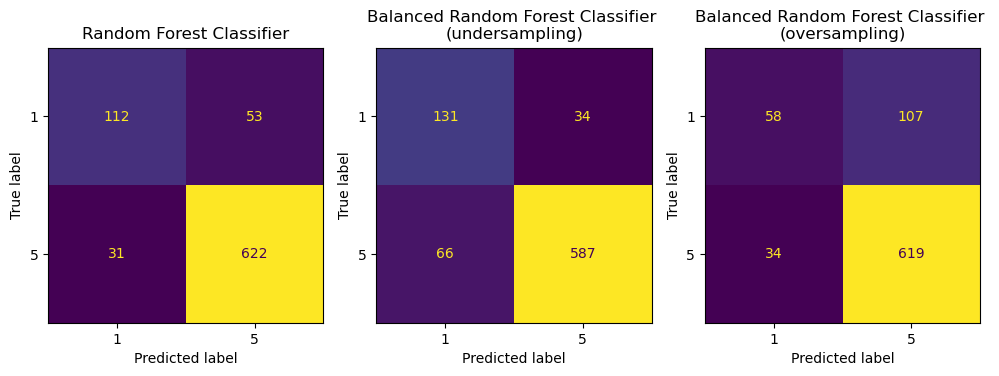

In [154]:
fig, axs = plt.subplots(ncols = 3, figsize = (10, 5))
plot_confusion_matrix(rf_grid_search, X_test, y_test, ax = axs[0], colorbar = False)
axs[0].set_title("Random Forest Classifier")

plot_confusion_matrix(rf_us_grid_search, X_test, y_test, ax = axs[1], colorbar = False)
axs[1].set_title("Balanced Random Forest Classifier \n(undersampling)")

plot_confusion_matrix(rf_os_grid_search, X_test, y_test, ax = axs[2], colorbar = False)
axs[2].set_title("Balanced Random Forest Classifier \n(oversampling)")

fig.tight_layout()

Original Random Forest Classifier made wrong predictions 84 times, whereas Balanced Random Forest Classifier with oversampling or undersampling were wrong 141 and 100 times. In this case is better using Logistic Regression with regularization.

## Linear SVC

In [155]:
# Define model

svc = LinearSVC(class_weight = 'balanced', C = 0.001, dual = True)

In [156]:
# Define parameters for GridSearch CV
svc_param_grid = {
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'dual': [True, False], 
    'multi_class': ['ovr', 'crammer_singer']
    }

In [157]:
# Define GridSearch CV
svc_grid_search = grid_search_model(svc, svc_param_grid, cv)

In [158]:
%%timeit -r 1 -n 1   # Calculate time needed for searching parameters and training
svc_grid_search.fit(X_train, y_train)

973 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [159]:
# The best parameters for this model
svc_grid_search.best_params_

{'dual': True, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l2'}

In [160]:
# Predict results
y_train_pred_svc = svc_grid_search.predict(X_train)
y_test_pred_svc = svc_grid_search.predict(X_test)

print('Train set')
print('LinearSVC roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_svc)))

print('Test set')
print('LinearSVC roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_svc)))

Train set
LinearSVC roc-auc: 0.934
Test set
LinearSVC roc-auc: 0.866


In [161]:
print(classification_report_imbalanced(y_train, y_train_pred_svc))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.74      0.94      0.93      0.83      0.93      0.87       584
          5       0.99      0.93      0.94      0.96      0.93      0.87      2684

avg / total       0.94      0.93      0.94      0.93      0.93      0.87      3268



In [162]:
print(classification_report_imbalanced(y_test, y_test_pred_svc))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.75      0.80      0.93      0.77      0.86      0.74       165
          5       0.95      0.93      0.80      0.94      0.86      0.76       653

avg / total       0.91      0.91      0.83      0.91      0.86      0.75       818



In [163]:
# Save the model results into lists
model_list.append('Linear SVC')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_svc), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_svc), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_svc), 3))

## SVC

In [164]:
# Define model
svm = SVC(kernel = 'poly', 
          class_weight = 'balanced', 
          probability = True, 
          gamma = 'scale',  
          C = 0.1, 
          degree = 1
         )

In [165]:
# Define parameters for GridSearch CV
svm_param_grid = [
{   'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [1, 2, 3]
}]

In [166]:
# Define GridSearch CV
svm_grid_search = grid_search_model(svm, svm_param_grid, cv)

In [167]:
%%timeit -r 1 -n 1   # Calculate time needed for searching parameters and training
svm_grid_search.fit(X_train, y_train)

12min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [168]:
# The best parameters for this model
svm_grid_search.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [169]:
# Predict results
y_train_pred_svm = svm_grid_search.predict(X_train)
y_test_pred_svm = svm_grid_search.predict(X_test)

print('Train set')
print('SVC roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_svm)))

print('Test set')
print('SVC roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_svm)))

Train set
SVC roc-auc: 0.962
Test set
SVC roc-auc: 0.882


In [170]:
print(classification_report_imbalanced(y_train, y_train_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.82      0.97      0.95      0.89      0.96      0.93       584
          5       0.99      0.95      0.97      0.97      0.96      0.92      2684

avg / total       0.96      0.96      0.97      0.96      0.96      0.92      3268



In [171]:
print(classification_report_imbalanced(y_test, y_test_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.81      0.81      0.95      0.81      0.88      0.76       165
          5       0.95      0.95      0.81      0.95      0.88      0.78       653

avg / total       0.92      0.92      0.84      0.92      0.88      0.78       818



In [172]:
# Save the model results into lists
model_list.append('SVC')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_svm), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_svm), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_svm), 3))

## SGDClassifier

In [173]:
# Define model
sgd_clf = SGDClassifier(random_state = 10, 
                        class_weight = 'balanced', 
                        alpha = 0.05, 
                        learning_rate = 'optimal', 
                        loss = 'modified_huber', 
                        penalty = 'l2'
                       )

In [174]:
# Define parameters for GridSearch CV
sgd_clf_param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'penalty': ['l2', 'l1'], 
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

In [175]:
# Define GridSearch CV
sgd_clf_grid_search = grid_search_model(sgd_clf, sgd_clf_param_grid, cv)

In [176]:
%%timeit -r 1 -n 1   # Calculate time needed for searching parameters and training
sgd_clf_grid_search.fit(X_train ,y_train)

1.12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [177]:
# The best parameters for this model
sgd_clf_grid_search.best_params_

{'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l2'}

In [178]:
# Predict results
y_train_pred_sgd = sgd_clf_grid_search.predict(X_train)

# Check how many times our model was wrong in train set
cm_sgd_train = confusion_matrix(y_train, y_train_pred_sgd)
cm_sgd_train

array([[ 560,   24],
       [ 187, 2497]])

In [179]:
# Predict results
y_test_pred_sgd = sgd_clf_grid_search.predict(X_test)

# Check how many times our model was wrong in test set
cm_sgd_test = confusion_matrix(y_test, y_test_pred_sgd)
cm_sgd_test

array([[134,  31],
       [ 41, 612]])

In [180]:
print('Train set')
print('SGDClassifier roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_sgd)))

print('Test set')
print('SGDClassifier roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_sgd)))

Train set
SGDClassifier roc-auc: 0.945
Test set
SGDClassifier roc-auc: 0.875


In [181]:
print(classification_report_imbalanced(y_train, y_train_pred_sgd))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.75      0.96      0.93      0.84      0.94      0.89       584
          5       0.99      0.93      0.96      0.96      0.94      0.89      2684

avg / total       0.95      0.94      0.95      0.94      0.94      0.89      3268



In [182]:
print(classification_report_imbalanced(y_test, y_test_pred_sgd))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.77      0.81      0.94      0.79      0.87      0.75       165
          5       0.95      0.94      0.81      0.94      0.87      0.77       653

avg / total       0.91      0.91      0.84      0.91      0.87      0.77       818



In [183]:
# Save the model results into lists
model_list.append('SGDClassifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_sgd), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_sgd), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_sgd), 3))

## Confusion matrix: Linear SVC, SVC, SGDClassifier

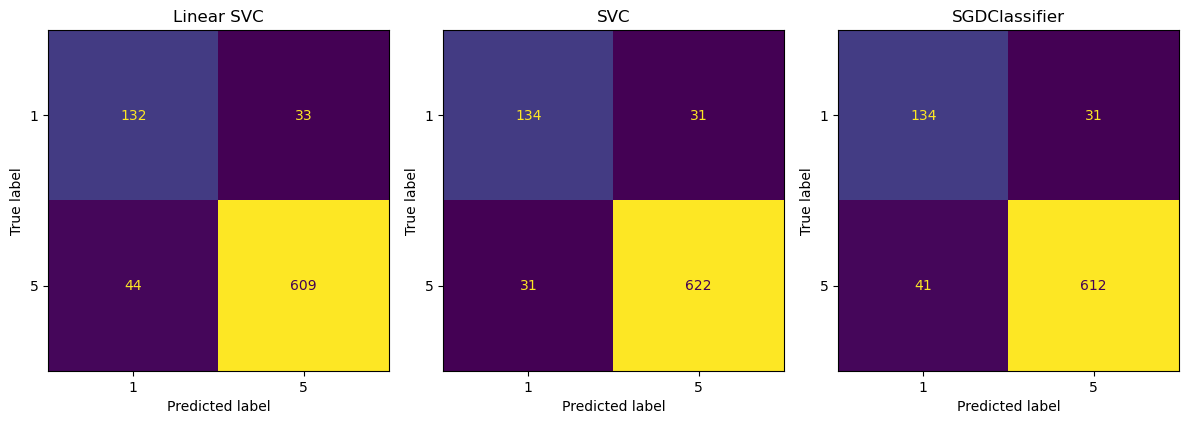

In [184]:
fig, axs = plt.subplots(ncols = 3, figsize = (12, 4))
plot_confusion_matrix(svc_grid_search, X_test, y_test, ax = axs[0], colorbar = False)
axs[0].set_title("Linear SVC")

plot_confusion_matrix(svm_grid_search, X_test, y_test, ax = axs[1], colorbar = False)
axs[1].set_title("SVC")

plot_confusion_matrix(sgd_clf_grid_search, X_test, y_test, ax = axs[2], colorbar = False)
axs[2].set_title("SGDClassifier")

fig.tight_layout()

Linear SVC was wrong 77 times, SVC - 62 times, SGD Classifier - 72. 

## Specific balanced algorithms from imbalanced-learn
## BalancedBaggingClassifier

In [185]:
# Define model
bbag_clf = BalancedBaggingClassifier(base_estimator = DecisionTreeClassifier(
                                    max_depth = 4, 
                                    criterion = 'entropy'), 
                                    random_state = 0, n_estimators = 90)

In [186]:
# Define parameters for GridSearch CV
bbag_clf_param_grid = {
     'n_estimators': [50, 70, 90],
     'base_estimator__max_depth': [2, 3, 4], 
     'base_estimator__criterion': ["gini", "entropy", "log_loss"],
     'base_estimator__max_features': ["sqrt", "log2", None]
}

In [187]:
# Define GridSearch CV
bbag_clf_grid_search = grid_search_model(bbag_clf, bbag_clf_param_grid , cv)

In [188]:
%%timeit -r 1 -n 1   # Calculate time needed for searching parameters and training
bbag_clf_grid_search.fit(X_train, y_train)

7min 35s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [189]:
# The best parameters for this model
bbag_clf_grid_search.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 4,
 'base_estimator__max_features': 'sqrt',
 'n_estimators': 90}

In [190]:
# Predict results

y_train_pred_bbag = bbag_clf_grid_search.predict(X_train)
y_test_pred_bbag = bbag_clf_grid_search.predict(X_test)

print('Train set')
print('Balanced Bagging Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_bbag)))

print('Test set')
print('Balanced Bagging Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_bbag)))

Train set
Balanced Bagging Classifier roc-auc: 0.879
Test set
Balanced Bagging Classifier roc-auc: 0.826


In [191]:
# Check how many times our model was wrong in train set
cm_bbag_train = confusion_matrix(y_train, y_train_pred_bbag)
cm_bbag_train

array([[ 506,   78],
       [ 292, 2392]])

In [192]:
# Check how many times our model was wrong in test set
cm_bbag_test = confusion_matrix(y_test, y_test_pred_bbag)
cm_bbag_test

array([[127,  38],
       [ 77, 576]])

In [193]:
print(classification_report_imbalanced(y_train, y_train_pred_bbag))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.63      0.87      0.89      0.73      0.88      0.77       584
          5       0.97      0.89      0.87      0.93      0.88      0.77      2684

avg / total       0.91      0.89      0.87      0.89      0.88      0.77      3268



In [194]:
print(classification_report_imbalanced(y_test, y_test_pred_bbag))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.62      0.77      0.88      0.69      0.82      0.67       165
          5       0.94      0.88      0.77      0.91      0.82      0.69       653

avg / total       0.87      0.86      0.79      0.86      0.82      0.68       818



In [195]:
# Save the model results into lists
model_list.append('Balanced Bagging Classifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_bbag), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_bbag), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_bbag), 3))

## BalancedRandomForestClassifier

In [196]:
# Define model
brf_clf = BalancedRandomForestClassifier(random_state = 10, n_estimators = 200, max_depth = 4)

In [197]:
# Define parameters for GridSearch CV
rf_param_grid = {   
    'n_estimators': [200, 300, 400],
    'max_depth': [2, 3, 4],
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'min_samples_split': [2, 3, 4], 
    'max_features': ["sqrt", "log2"], 
    'warm_start': [False, True]
}

In [198]:
# Define GridSearch CV
brf_clf_grid_search = grid_search_model(brf_clf, rf_param_grid, cv)

In [199]:
%%timeit -r 1 -n 1   # Calculate time needed for searching parameters and training
brf_clf_grid_search.fit(X_train, y_train)

42min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [200]:
# The best parameters for this model
brf_clf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 400,
 'warm_start': False}

In [201]:
# Predict results

y_train_pred_brf = brf_clf_grid_search.predict(X_train)
y_test_pred_brf = brf_clf_grid_search.predict(X_test)

print('Train set')
print('Balanced Random Forest Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_brf)))

print('Test set')
print('Balanced Random Forest Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_brf)))

Train set
Balanced Random Forest Classifier roc-auc: 0.878
Test set
Balanced Random Forest Classifier roc-auc: 0.829


In [202]:
# Check how many times our model was wrong in train set
cm_brf_train = confusion_matrix(y_train, y_train_pred_brf)
cm_brf_train

array([[ 493,   91],
       [ 238, 2446]])

In [203]:
# Check how many times our model was wrong in test set
cm_brf_test = confusion_matrix(y_test, y_test_pred_brf)
cm_brf_test

array([[127,  38],
       [ 73, 580]])

In [204]:
print(classification_report_imbalanced(y_train, y_train_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.84      0.91      0.75      0.88      0.76       584
          5       0.96      0.91      0.84      0.94      0.88      0.77      2684

avg / total       0.91      0.90      0.86      0.90      0.88      0.77      3268



In [205]:
print(classification_report_imbalanced(y_test, y_test_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.64      0.77      0.89      0.70      0.83      0.68       165
          5       0.94      0.89      0.77      0.91      0.83      0.69       653

avg / total       0.88      0.86      0.79      0.87      0.83      0.69       818



In [206]:
# Save the model results into lists
model_list.append('Balanced Random Forest Classifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_brf), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_brf), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_brf), 3))

## EasyEnsembleClassifier

In [207]:
# Define base estimator
base_estimator = AdaBoostClassifier(n_estimators = 40, random_state = 10)

In [208]:
# Define model
eec = EasyEnsembleClassifier(n_estimators = 60, base_estimator = base_estimator, random_state = 10)

In [209]:
# Define parameters for GridSearch CV
eec_param_grid = {
     'base_estimator__n_estimators': [20, 30, 40], 
     'base_estimator__learning_rate': [0.01, 0.1, 1], 
     'base_estimator__algorithm': ["SAMME", "SAMME.R"]
}

In [210]:
# Define GridSearch CV
eec_grid_search = grid_search_model(eec, eec_param_grid, cv)

In [211]:
%%timeit -r 1 -n 1    # Calculate time needed for searching parameters and training

eec_grid_search.fit(X_train, y_train)

1h 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [212]:
# The best parameters for this model
eec_grid_search.best_params_

{'base_estimator__algorithm': 'SAMME.R',
 'base_estimator__learning_rate': 1,
 'base_estimator__n_estimators': 40}

In [213]:
# Predict results
y_train_pred_eec = eec_grid_search.predict(X_train)
y_test_pred_eec = eec_grid_search.predict(X_test)

print('Train set')
print('Easy Ensemble Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_eec)))

print('Test set')
print('Easy Ensemble Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_eec)))

Train set
Easy Ensemble Classifier roc-auc: 0.906
Test set
Easy Ensemble Classifier roc-auc: 0.847


In [214]:
# Check how many times our model was wrong in train set

cm_eec_train = confusion_matrix(y_train, y_train_pred_eec)
cm_eec_train

array([[ 568,   16],
       [ 430, 2254]])

In [215]:
# Check how many times our model was wrong in test set
cm_eec_test = confusion_matrix(y_test, y_test_pred_eec)
cm_eec_test

array([[145,  20],
       [121, 532]])

In [216]:
print(classification_report_imbalanced(y_train, y_train_pred_eec))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.57      0.97      0.84      0.72      0.90      0.83       584
          5       0.99      0.84      0.97      0.91      0.90      0.81      2684

avg / total       0.92      0.86      0.95      0.88      0.90      0.81      3268



In [217]:
print(classification_report_imbalanced(y_test, y_test_pred_eec))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.55      0.88      0.81      0.67      0.85      0.72       165
          5       0.96      0.81      0.88      0.88      0.85      0.71       653

avg / total       0.88      0.83      0.87      0.84      0.85      0.71       818



In [218]:
# Save the model results into lists
model_list.append('Easy Ensemble Classifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_eec), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_eec), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_eec), 3))

## RUSBoostClassifier

In [219]:
# Define model
rusboost = RUSBoostClassifier(n_estimators = 60, 
                              base_estimator = base_estimator, 
                              learning_rate = 0.05, 
                              algorithm = "SAMME")

In [220]:
# Define parameters for GridSearch CV
rusboost_param_grid = { 
     'base_estimator__n_estimators': [40, 50, 60], 
     'base_estimator__learning_rate': [0.01, 0.05, 0.1],
}

In [221]:
# Define GridSearch CV
rusboost_grid_search = grid_search_model(rusboost, rusboost_param_grid, cv)

In [222]:
%%timeit -r 1 -n 1    # Calculate time needed for searching parameters and training
rusboost_grid_search.fit(X_train, y_train)

35min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [223]:
# The best parameters for this model
rusboost_grid_search.best_params_

{'base_estimator__learning_rate': 0.1, 'base_estimator__n_estimators': 60}

In [224]:
# Predict results
y_train_pred_rusb = rusboost_grid_search.predict(X_train)
y_test_pred_rusb = rusboost_grid_search.predict(X_test)

print('Train set')
print('Easy Ensemble Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_rusb)))

print('Test set')
print('Easy Ensemble Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_rusb)))

Train set
Easy Ensemble Classifier roc-auc: 0.901
Test set
Easy Ensemble Classifier roc-auc: 0.843


In [225]:
# Check how many times our model was wrong in train set
cm_rusboost_train = confusion_matrix(y_train, y_train_pred_rusb)
cm_rusboost_train

array([[ 544,   40],
       [ 345, 2339]])

In [226]:
# Check how many times our model was wrong in test set
cm_rusboost_test = confusion_matrix(y_test, y_test_pred_rusb)
cm_rusboost_test

array([[139,  26],
       [102, 551]])

In [227]:
print(classification_report_imbalanced(y_train, y_train_pred_rusb))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.61      0.93      0.87      0.74      0.90      0.82       584
          5       0.98      0.87      0.93      0.92      0.90      0.81      2684

avg / total       0.92      0.88      0.92      0.89      0.90      0.81      3268



In [228]:
print(classification_report_imbalanced(y_test, y_test_pred_rusb))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.58      0.84      0.84      0.68      0.84      0.71       165
          5       0.95      0.84      0.84      0.90      0.84      0.71       653

avg / total       0.88      0.84      0.84      0.85      0.84      0.71       818



In [229]:
# Save the model results into lists
model_list.append('RUSBoost Classifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_rusb), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_rusb), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_rusb), 3))

## Confusion matrix: classification from imbalanced-learn

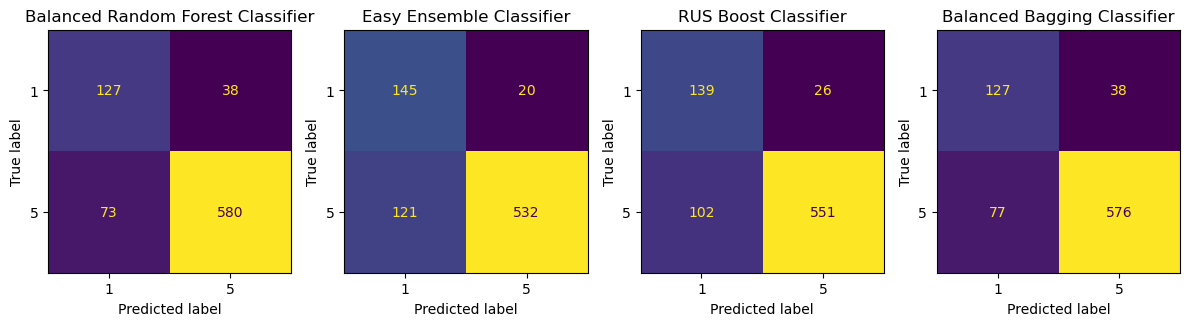

In [230]:
fig, axs = plt.subplots(ncols = 4, figsize = (12, 5))
plot_confusion_matrix(brf_clf_grid_search, X_test, y_test, ax = axs[0], colorbar = False)
axs[0].set_title("Balanced Random Forest Classifier")

plot_confusion_matrix(eec_grid_search, X_test, y_test, ax = axs[1], colorbar = False)
axs[1].set_title("Easy Ensemble Classifier")

plot_confusion_matrix(rusboost_grid_search, X_test, y_test, ax = axs[2], colorbar = False)
axs[2].set_title("RUS Boost Classifier")

plot_confusion_matrix(bbag_clf_grid_search, X_test, y_test, ax = axs[3], colorbar = False)
axs[3].set_title("Balanced Bagging Classifier")

fig.tight_layout()

Balanced Random Forest Classifier and Balanced Bagging Classifier showed similiar results. Easy Ensemble Classifier made more wrong predictions than other models from imbalanced-learn.

## Voting Classifier

In [231]:
models = list()

models.append(('lr', LogisticRegression(random_state = 0, 
                        class_weight = 'balanced', 
                        C = 0.05, 
                        max_iter = 200, 
                        multi_class = 'multinomial')))

models.append(('svc', SVC(kernel = 'poly', 
                          class_weight = 'balanced', 
                          probability = True, 
                          gamma = 'scale',  
                          C = 0.1, 
                          degree = 1)))
              
models.append(('sgd', SGDClassifier(random_state = 10, 
                        class_weight = 'balanced', 
                        alpha = 0.05, 
                        learning_rate = 'optimal', 
                        loss = 'modified_huber', 
                        penalty = 'l2')))

In [232]:
# Define model
ensemble = VotingClassifier(estimators = models, voting = 'hard')

In [233]:
%%timeit -r 1 -n 1    # Calculate time needed for searching parameters and training
ensemble.fit(X_train, y_train)

13.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [234]:
# Predict results
y_train_pred_voting = ensemble.predict(X_train)
y_test_pred_voting = ensemble.predict(X_test)

print('Train set')
print('Voting Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_train, y_train_pred_voting)))

print('Test set')
print('Voting Classifier roc-auc: {:.3f}'. format(roc_auc_score(y_test, y_test_pred_voting)))

Train set
Voting Classifier roc-auc: 0.951
Test set
Voting Classifier roc-auc: 0.872


In [236]:
# Check how many times our model was wrong in train set
cm_voting_train = confusion_matrix(y_train, y_train_pred_voting)
cm_voting_train

array([[ 560,   24],
       [ 151, 2533]])

In [237]:
# Check how many times our model was wrong in test set
cm_voting_test = confusion_matrix(y_test, y_test_pred_voting)
cm_voting_test

array([[131,  34],
       [ 33, 620]])

In [238]:
# Save the model results into lists
model_list.append('Voting Classifier')
roc_auc_score_list.append(round(roc_auc_score(y_test, y_test_pred_voting), 3))
balanced_accuracy_list.append(round(balanced_accuracy_score(y_test, y_test_pred_voting), 3))
geometric_mean_list.append(round(geometric_mean_score(y_test, y_test_pred_voting), 3))

### Confusion matrix: Voting Classifier

Text(0.5, 1.0, 'Voting Classifier(test)')

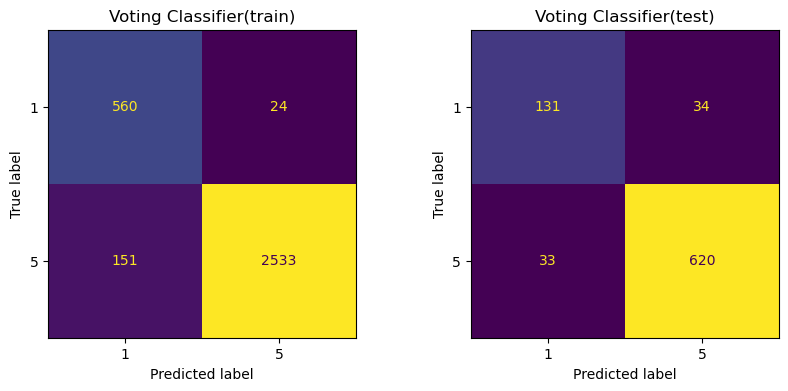

In [239]:
fig, axs = plt.subplots(ncols = 2, figsize = (10, 4))
plot_confusion_matrix(ensemble, X_train, y_train, ax = axs[0], colorbar = False)
axs[0].set_title("Voting Classifier(train)")

plot_confusion_matrix(ensemble, X_test, y_test, ax = axs[1], colorbar = False)
axs[1].set_title("Voting Classifier(test)")

## Step #6: Evaluating the model

In [240]:
model_results = pd.DataFrame({'Model': model_list, 
                             'roc_auc_score': roc_auc_score_list, 
                             'balanced_accuracy_score': balanced_accuracy_list, 
                             'geometric_mean_score': geometric_mean_list})
model_results

,Model,roc_auc_score,balanced_accuracy_score,geometric_mean_score
0,Complement Naive Bayes,0.884,0.884,0.884
1,Complement Naive Bayes (oversampling),0.755,0.755,0.727
2,Complement Naive Bayes (undersampling),0.868,0.868,0.868
3,Logistic Regression,0.873,0.873,0.870
4,Logistic Regression (oversampling),0.805,0.805,0.790
5,Logistic Regression (undersampling),0.817,0.817,0.813
6,Bagging Classifier,0.771,0.771,0.766
7,Bagging Classifier (oversampling),0.771,0.771,0.766
8,Bagging Classifier (undersampling),0.745,0.745,0.744
9,Random Forest Classifier,0.816,0.816,0.804


In [241]:
model_results.sort_values(by ='roc_auc_score', ascending = False)

,Model,roc_auc_score,balanced_accuracy_score,geometric_mean_score
0,Complement Naive Bayes,0.884,0.884,0.884
13,SVC,0.882,0.882,0.880
14,SGDClassifier,0.875,0.875,0.872
3,Logistic Regression,0.873,0.873,0.870
19,Voting Classifier,0.872,0.872,0.868
2,Complement Naive Bayes (undersampling),0.868,0.868,0.868
12,Linear SVC,0.866,0.866,0.864
17,Easy Ensemble Classifier,0.847,0.847,0.846
11,Random Forest Classifier (undersampling),0.846,0.846,0.845
18,RUSBoost Classifier,0.843,0.843,0.843


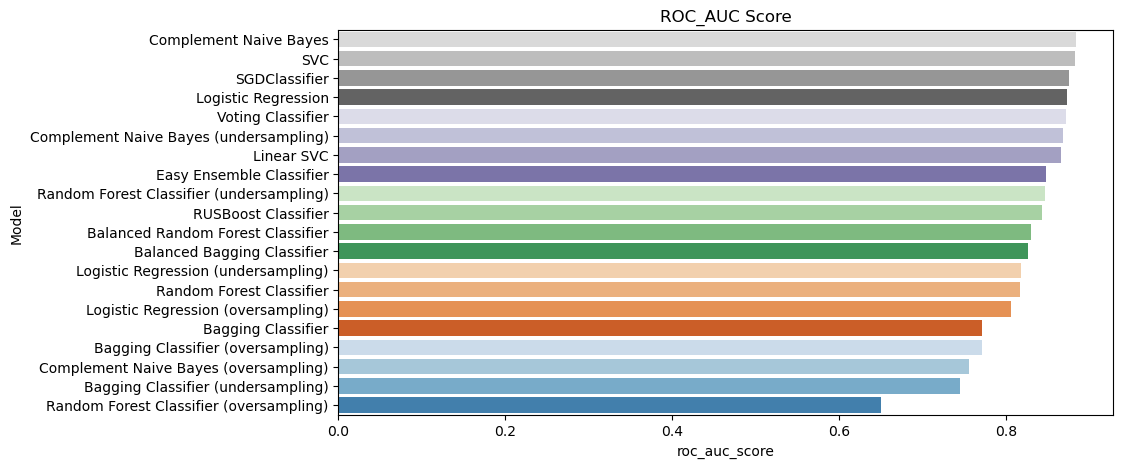

In [242]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='roc_auc_score', ascending = False), 
            x = 'roc_auc_score', y = 'Model', palette = 'tab20c_r')
plt.title("ROC_AUC Score")
plt.show()

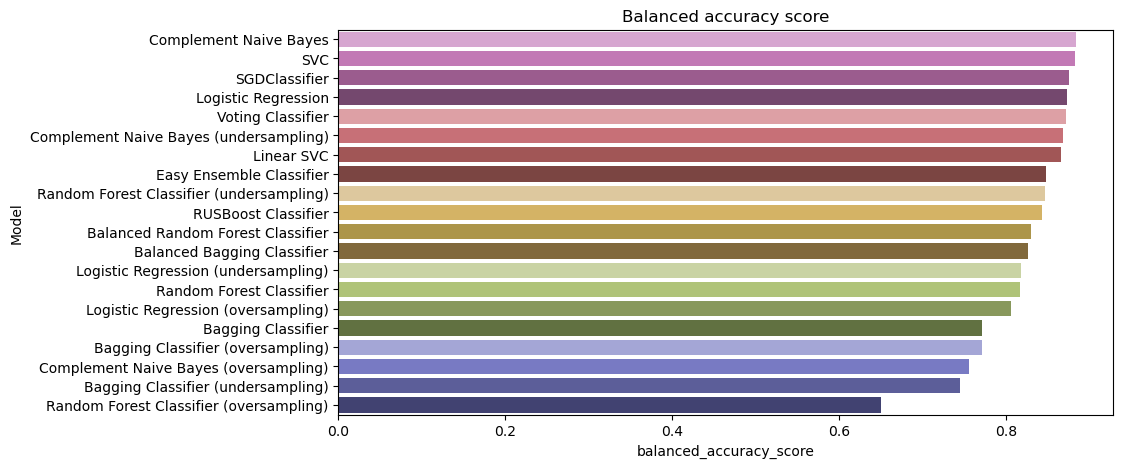

In [243]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='balanced_accuracy_score', ascending = False), 
            x = 'balanced_accuracy_score', y = 'Model', palette = 'tab20b_r')
plt.title("Balanced accuracy score")
plt.show()

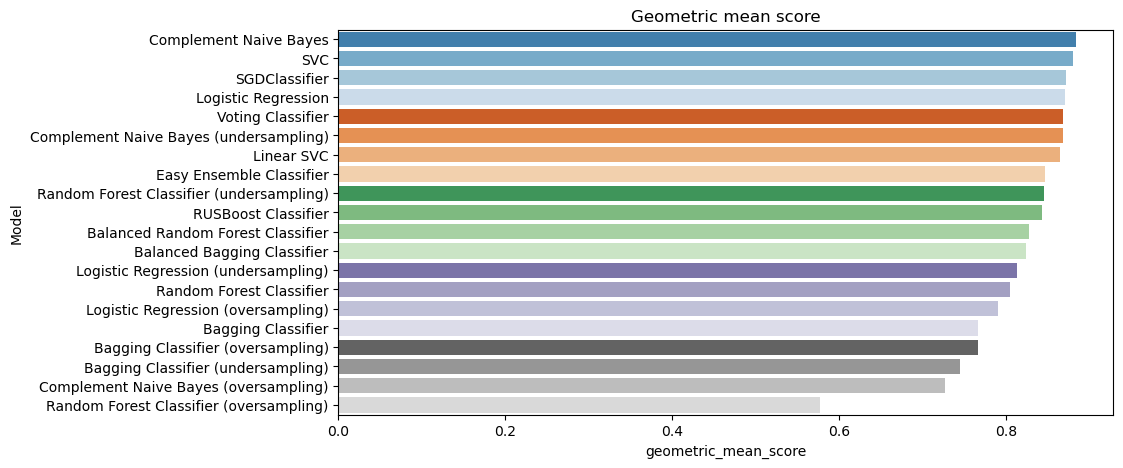

In [244]:
plt.figure(figsize=(10, 5))
sns.barplot(data = model_results.sort_values(by ='geometric_mean_score', ascending = False), 
            x = 'geometric_mean_score', y = 'Model', palette = 'tab20c')
plt.title("Geometric mean score")
plt.show()

Nevertheless Complement Naive Bayes model showed high scores of roc_auc, balanced accuracy and geometric_mean ccore, SVC made less wrong prediction of Type II error, so I'll recommend SVC model for this dataset.

## Step #6: Testing review

In [245]:
svm = SVC(kernel = 'poly', 
          class_weight = 'balanced', 
          probability = True, 
          gamma = 'scale',  
          C = 0.1, 
          degree = 1)

svm.fit(X_train, y_train)

SVC(C=0.1, class_weight='balanced', degree=1, kernel='poly', probability=True)

In [246]:
testing_sample = [str(input("Enter review : "))]
testing_sample_vectorizer = vectorizer.transform(testing_sample)
test_predict = svm.predict(testing_sample_vectorizer)

if test_predict == 5:
    print('\nPositive review')
else:
    print('\nNegative review')

Enter review : Went for brunch on Sunday, short wait for patio seating. When the server finally came to table, his only comment was “I’m overwhelmed,” He brought two glasses of water..we were a party of five. Order was taken and food was delivered in a timely fashion. Was good. The problem was customer service, we never received the bread/cake to enjoy while waiting, never had a drink refilled, after asking for jelly and ketchup, they were brought with the bill

Negative review


## Step #7: Conclusion

- Yelp review dataset is very unbalanced (81.7% positives reviews vs 18.3% negative reviews).

- We used only preprocessed text with TF-IDF vectorizer in training models. In this study we've trained machine learning models with regularization (class_weight = 'balanced'), then implemented balancing methods and specific algorithms from scikit-learn.imbalanced library.

#### Insights:
- In the case of an unbalanced dataset, they do a better job of predicting models in which you can adjust parameter class_weight = 'balanced' (like Logistic Regression, SVC)

- We've tried to apply strategies to balance the dataset, but the results according to machine learning model is not always be better than if we did not change the balance.

- Under-sampling can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.

- Under-sampling can discard potentially useful information which could be important for building rule classifiers. The sample chosen by random under-sampling may be a biased sample. And it will not be an accurate representation of the population. Thereby, resulting in inaccurate results with the actual test data set.

- Over-sampling unlike under-sampling, this method leads to no information loss. Outperforms under sampling. But it increases the likelihood of overfitting since it replicates the minority class events.

- We used specific models from scikit-learn imbalanced library. But they did not scored better than classic machine learning models.

- In accordance with the results of the tested models and results of confusion matrix (type I and type II error ratio) the best estimate was shown by SVC(kernel = 'poly').

This study could be improved upon by also training wit neural networks, such as LSTM which I am going to use in the following.

Thank you!